In [2]:
import warnings

from IPython.display import HTML
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rc('image', cmap='RdYlBu_r')

warnings.filterwarnings("ignore")
%matplotlib inline

<figure>
<center><img src='Title_slide.png' style='width:850px;'></center>
<figcaption style="text-align: right">

<figure>
<center><img src='img/Data_structure_3.png' style='width:850px;'></center>
<figcaption style="text-align: right">

<h3>A Closer Look at Detector Data:</h3>
<figure>
<center><img src='img/AGIPD_inspect.png' style='height:450px;'></center>
<figcaption style="text-align: right">Data from Modular Detectors is stored across multiple files</figcaption>
</figure>

Using standard hdf5 tools can be tricky and tedious


<div class="text_cell_render border-box-sizing rendered_html">
<font size='2'>
<div class="highlight"><pre><span></span><span class="gp">$</span>: lsxfel /gpfs/exfel/exp/XMPL/201750/p700000/raw/r0273
<span class="go">r0273 : Run directory</span>

<span class="gp">#</span> of trains:    <span class="m">156</span>
<span class="go">Duration:       0:00:15.500000</span>
<span class="go">First train ID: 198425241</span>
<span class="go">Last train ID:  198425396</span>

<span class="go">16 detector modules (SPB_DET_AGIPD1M-1)</span>
<span class="go">  e.g. module SPB_DET_AGIPD1M-1 0 : 512 x 128 pixels</span>
<span class="go">  176 frames per train, 27456 total frames</span>

<span class="go">2 instrument sources (excluding detectors):</span>
<span class="go">  - SA1_XTD2_XGM/XGM/DOOCS:output</span>
<span class="go">  - SPB_XTD9_XGM/XGM/DOOCS:output</span>

<span class="go">13 control sources:</span>
<span class="go">  - ACC_SYS_DOOCS/CTRL/BEAMCONDITIONS</span>
<span class="go">  - SA1_XTD2_XGM/XGM/DOOCS</span>
<span class="go">  - SPB_IRU_AGIPD1M/PSC/HV</span>
<span class="go">  - SPB_IRU_AGIPD1M/TSENS/H1_T_EXTHOUS</span>
<span class="go">  - SPB_IRU_AGIPD1M/TSENS/H2_T_EXTHOUS</span>
<span class="go">  - SPB_IRU_AGIPD1M/TSENS/Q1_T_BLOCK</span>
<span class="go">  - SPB_IRU_AGIPD1M/TSENS/Q2_T_BLOCK</span>
<span class="go">  - SPB_IRU_AGIPD1M/TSENS/Q3_T_BLOCK</span>
<span class="go">  - SPB_IRU_AGIPD1M/TSENS/Q4_T_BLOCK</span>
<span class="go">  - SPB_IRU_AGIPD1M1/CTRL/MC1</span>
<span class="go">  - SPB_IRU_AGIPD1M1/CTRL/MC2</span>
<span class="go">  - SPB_IRU_VAC/GAUGE/GAUGE_FR_6</span>
<span class="go">  - SPB_XTD9_XGM/XGM/DOOCS</span>
</font>
</pre></div>

## *karabo-data*
* Python Library that supports Analysis of EuXFEL Data.
* It is Open Source and available on the maxwell cluster.

## Aim of this presentation:
Give you a glimpse of what is possible and provide a ground base for your own data analysis at EuXFEL

## Scenario I: Take a quick look at some detector data

<figure>
<center><img src='img/AGIPD_module.png' style='height:250px;'></center>
<figcaption style="text-align: right">An image from a single module of the AGIP-D Detector at SPB</figcaption>
</figure>

* How could this data be retrieved and visualized?

### Reading single files:

In [3]:
#Live-demo
import karabo_data as kd
exmpl_file = '/gpfs/exfel/exp/XMPL/201750/p700000/proc/r0273/CORR-R0273-AGIPD03-S00000.h5'
hdf5_file = kd.H5File(exmpl_file)

Data can be accessed by:
* selecting trains by id's &rarr; ```.train_from_id```
* selecting trains by indexes &rarr; ```.train_from_index```
* iteration (looping) over trains &rarr; ```.trains```

**Let's select data based on indexes:**

In [4]:
#Live-demo (sel from index)
train_id, train_data = hdf5_file.train_from_index(5)
print(train_id, train_data.keys())

198425246 dict_keys(['SPB_DET_AGIPD1M-1/DET/3CH0:xtdf'])


The data is stored in a so called *dictionary*. Hence the data can be accessed by giving keys:

## Reading whole Runs
The main advantage of karabo-data is that not only single files at a time but whole runs can be read:

In [5]:
run_folder = '/gpfs/exfel/exp/XMPL/201750/p700000/raw/r0273'
run_dir = kd.RunDirectory(run_folder)
run_dir.info()

# of trains:    156
Duration:       0:00:15.500000
First train ID: 198425241
Last train ID:  198425396

16 detector modules (SPB_DET_AGIPD1M-1)
  e.g. module SPB_DET_AGIPD1M-1 0 : 512 x 128 pixels
  176 frames per train, 27456 total frames

2 instrument sources (excluding detectors):
  - SA1_XTD2_XGM/XGM/DOOCS:output
  - SPB_XTD9_XGM/XGM/DOOCS:output

13 control sources:
  - ACC_SYS_DOOCS/CTRL/BEAMCONDITIONS
  - SA1_XTD2_XGM/XGM/DOOCS
  - SPB_IRU_AGIPD1M/PSC/HV
  - SPB_IRU_AGIPD1M/TSENS/H1_T_EXTHOUS
  - SPB_IRU_AGIPD1M/TSENS/H2_T_EXTHOUS
  - SPB_IRU_AGIPD1M/TSENS/Q1_T_BLOCK
  - SPB_IRU_AGIPD1M/TSENS/Q2_T_BLOCK
  - SPB_IRU_AGIPD1M/TSENS/Q3_T_BLOCK
  - SPB_IRU_AGIPD1M/TSENS/Q4_T_BLOCK
  - SPB_IRU_AGIPD1M1/CTRL/MC1
  - SPB_IRU_AGIPD1M1/CTRL/MC2
  - SPB_IRU_VAC/GAUGE/GAUGE_FR_6
  - SPB_XTD9_XGM/XGM/DOOCS



All previously mentioned methods are also available from the ``RunDirectory`` object

## Scenario II: Extracting 1D Data
<figure>
<center><img src='img/PhotonFlux.png' style='height:350px;'></center>
<figcaption style="text-align: right">Photon flux *time-series* (by trainID)</figcaption>
</figure>

* How can 1D data be extracted and plotted?

The *get_series* method can extract a series across trainID's for a given device and property:

## Scenario III: Combining and Plotting data sources
<figure>
<center><img src='img/Dataframe.png' style='height:350px;'></center>
<figcaption style="text-align: right">Beam-Pos in *SA1* and *SPB* </figcaption>
</figure>

* How can 2 data sources be combined?

* Multiple dataset can be selected using the ```get_dataframe``` method:

In [14]:
sorted(run_dir.selection.keys())

['ACC_SYS_DOOCS/CTRL/BEAMCONDITIONS',
 'SA1_XTD2_XGM/XGM/DOOCS',
 'SA1_XTD2_XGM/XGM/DOOCS:output',
 'SPB_DET_AGIPD1M-1/DET/0CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/10CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/11CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/12CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/13CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/14CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/15CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/1CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/2CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/3CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/4CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/5CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/6CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/7CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/8CH0:xtdf',
 'SPB_DET_AGIPD1M-1/DET/9CH0:xtdf',
 'SPB_IRU_AGIPD1M/PSC/HV',
 'SPB_IRU_AGIPD1M/TSENS/H1_T_EXTHOUS',
 'SPB_IRU_AGIPD1M/TSENS/H2_T_EXTHOUS',
 'SPB_IRU_AGIPD1M/TSENS/Q1_T_BLOCK',
 'SPB_IRU_AGIPD1M/TSENS/Q2_T_BLOCK',
 'SPB_IRU_AGIPD1M/TSENS/Q3_T_BLOCK',
 'SPB_IRU_AGIPD1M/TSENS/Q4_T_BLOCK',
 'SPB_IRU_AGIPD1M1/CTRL/MC1',
 'SPB_IRU_AGIPD1M1/CTRL/MC2',
 'SPB_

In [16]:
xgm_data = run_dir.get_dataframe(fields=[('*/XGM/DOOCS', '*')])

In [17]:
#Live-demo (get dataframe)
xgm_data.head(10)

,SA1_XTD2_XGM/XGM/DOOCS/beamPosition.ixPos,SA1_XTD2_XGM/XGM/DOOCS/pressure.rsp,SA1_XTD2_XGM/XGM/DOOCS/current.top.output,SA1_XTD2_XGM/XGM/DOOCS/current.bottom.output,SA1_XTD2_XGM/XGM/DOOCS/current.right.rangeCode,SA1_XTD2_XGM/XGM/DOOCS/pulseEnergy.crossUsed,SA1_XTD2_XGM/XGM/DOOCS/current.top.rangeCode,SA1_XTD2_XGM/XGM/DOOCS/current.bottom.rangeCode,SA1_XTD2_XGM/XGM/DOOCS/gasDosing.measuredPressure,SA1_XTD2_XGM/XGM/DOOCS/current.left.output,...,SPB_XTD9_XGM/XGM/DOOCS/pressure.dcr,SPB_XTD9_XGM/XGM/DOOCS/pulseEnergy.conversion,SPB_XTD9_XGM/XGM/DOOCS/pressure.gasType,SPB_XTD9_XGM/XGM/DOOCS/pollingInterval,SPB_XTD9_XGM/XGM/DOOCS/pressure.pressureFiltered,SPB_XTD9_XGM/XGM/DOOCS/gasSupply.gsdCompatId,SPB_XTD9_XGM/XGM/DOOCS/pulseEnergy.pressure,SPB_XTD9_XGM/XGM/DOOCS/pulseEnergy.temperature,SPB_XTD9_XGM/XGM/DOOCS/pulseEnergy.wavelengthUsed,SPB_XTD9_XGM/XGM/DOOCS/pulseEnergy.photonFlux
trainId,,,,,,,,,,,,,,,,,,,,,
198425241,1.293711,412.100006,1.385747e-10,1.297712e-10,2,0.047601,2,2,0.000050,1.215298e-10,...,0.000003,2.137392e+09,1,50,0.000024,4,0.000024,23.120001,0.133316,404.392822
198425242,1.293711,412.100006,1.385747e-10,1.297712e-10,2,0.047601,2,2,0.000050,1.215298e-10,...,0.000003,2.137392e+09,1,50,0.000024,4,0.000024,23.120001,0.133316,404.392822
198425243,1.293711,412.100006,1.385747e-10,1.297712e-10,2,0.047601,2,2,0.000049,1.215298e-10,...,0.000003,2.137392e+09,1,50,0.000024,4,0.000024,23.120001,0.133316,404.392822
198425244,1.336566,412.100006,1.385747e-10,1.297712e-10,2,0.047601,2,2,0.000049,1.215298e-10,...,0.000003,2.137392e+09,1,50,0.000024,4,0.000024,23.120001,0.133316,404.392822
198425245,1.336566,412.100006,1.393239e-10,1.305283e-10,2,0.047601,2,2,0.000049,1.222363e-10,...,0.000003,2.137392e+09,1,50,0.000024,4,0.000024,23.120001,0.133316,404.392822
198425246,1.336566,412.100006,1.393239e-10,1.305283e-10,2,0.047601,2,2,0.000049,1.222363e-10,...,0.000003,2.137392e+09,1,50,0.000024,4,0.000024,23.120001,0.133316,404.392822
198425247,1.336566,412.100006,1.393239e-10,1.305283e-10,2,0.047601,2,2,0.000049,1.222363e-10,...,0.000003,2.137392e+09,1,50,0.000024,4,0.000024,23.120001,0.133316,404.665680
198425248,1.336566,412.100006,1.393239e-10,1.305283e-10,2,0.047601,2,2,0.000049,1.222363e-10,...,0.000003,2.137392e+09,1,50,0.000024,4,0.000024,23.120001,0.133316,404.665680
198425249,1.336566,412.100006,1.393239e-10,1.305283e-10,2,0.047601,2,2,0.000049,1.222363e-10,...,0.000003,2.137392e+09,1,50,0.000024,4,0.000024,23.120001,0.133316,406.852539


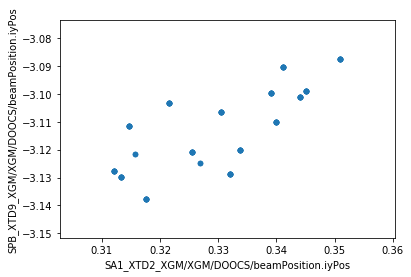

In [18]:
#fig = plt.figure(figsize=(10,5))
xgm_data.plot.scatter(x='SA1_XTD2_XGM/XGM/DOOCS/beamPosition.iyPos', y='SPB_XTD9_XGM/XGM/DOOCS/beamPosition.iyPos')

### What is *pandas*
*get_dataframe* and *get_series* return **pandas** objects which are extremely useful for extensive data analysis tasks. More information is available under https://pandas.pydata.org.

## Scenario IV: Getting data with multiple values per train
<figure>
<center><img src='img/XGMIntensity.png' style='height:350px;'></center>
<figcaption style="text-align: right">XGM intensity data is pulse resolved</figcaption>
</figure>

* How can this 2D data be extracted and plotted?

the *get_array* method returns a data array that contains more than one value per train. XGM intensity data is pulse resolved and serves as an example:

In [6]:
#Live-demo get array
xgm_intensity = run_dir.get_array('SA1_XTD2_XGM/XGM/DOOCS:output', 'data.intensityTD', 
                                  extra_dims=['pulseId'])
xgm_intensity

<xarray.DataArray (trainId: 156, pulseId: 1000)>
array([[ 957.0532 , 1026.0005 ,  949.8755 , ...,    0.     ,    0.     ,
           0.     ],
       [ 763.8806 ,  794.2738 ,  868.2455 , ...,    0.     ,    0.     ,
           0.     ],
       [ 859.37   ,  995.1641 ,  838.5669 , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [ 945.2731 ,  812.4336 ,  839.45654, ...,    0.     ,    0.     ,
           0.     ],
       [ 903.26855,  940.15125,  953.9436 , ...,    0.     ,    0.     ,
           0.     ],
       [ 944.08386,  949.549  ,  861.7509 , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)
Coordinates:
  * trainId  (trainId) uint64 198425241 198425242 ... 198425395 198425396
Dimensions without coordinates: pulseId

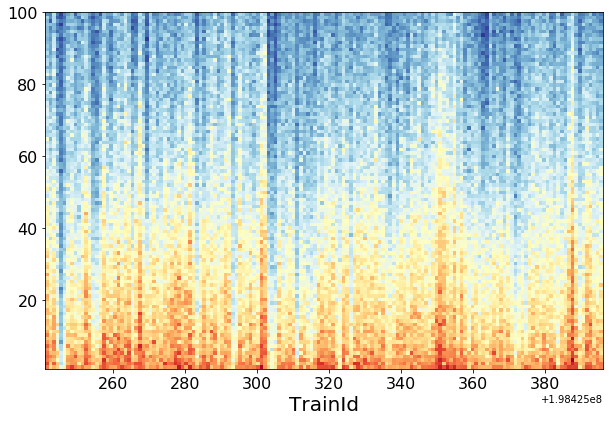

In [14]:
#Live-demo (plot)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
im = ax.imshow(xgm_intensity[:,:100].T,
              extent=(xgm_intensity.trainId[0], xgm_intensity.trainId[-1], 1, 100),
              origin='lower', cmap='RdYlBu_r')
_ = ax.set_xlabel('TrainId', fontsize=20)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
fig.savefig('img/XGMIntensity.png', bbox_inches='tight', format='png')

a labeled array (**xarray**) is returned. More information on labeled arrays can be found on http://xarray.pydata.org

## Scenario V: In the unlikely event if something goes wrong
A common source of errors is an invalid structure of the created data files. Hence a useful starting point to debug any errors is to check for valid file structures using the ```karabo-data-validate``` command

<div class="highlight"><font size='8'>
    <pre><span></span><span class="gp">$</span>: karabo-data-validate /gpfs/exfel/exp/XMPL/201750/p700000/raw/r0273
<span class="go">Checking run directory: /gpfs/exfel/exp/XMPL/201750/p700000/raw/r0273</span>
<span class="go">No problems found</span>
</pre></font></div>


The command checks if:

* All .h5 files in a run can be opened, and the run contains at least one usable file.
* The list of train IDs in a file has no zeros except for padding at the end.
* Each train ID in a file is greater than the one before it.
* The indexes do not point to data beyond the end of a dataset.
* The indexes point to the start of the dataset, and then to successive chunks for successive trains, without gaps or overlaps between them.


# How to install/get karabo-data?

Karabo-data is available on GitHub and there are multiple ways to install it:
* it is automatically available when you enter maxwell via jupyther-hub &rarr; https://max-jhub.desy.de
* it is installed in maxwell's anaconda environment &rarr; ```module load anaconda/3```
* it can be install using *pip* &rarr; ```pip install (--user) karabo_data```
* the latest version could be downloaded from GitHub &rarr; ```git clone https://github.com/European-XFEL/karabo_data.git```

**A much more detailed documentation is available on *readthedocs* **:

https://karabo-data.readthedocs.io/en/latest/